In this note book I will load trajectories of all 10 ligands, featurized the raw positions of the six Cs on the aromatic ring, and cluster using the position of the center of the ring.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


In [5]:
import mdtraj as md
import os

from msmbuilder.featurizer import RawPositionsFeaturizer
from msmbuilder.cluster import KCenters

In [7]:
data_path = os.path.expanduser('~/Documents/GitHub/TryMSMbuilder/data/pnas2011a-A-0-no-water-no-lipid/pnas2011a-A-0-no-water-no-lipid-000.dcd'
                   )
topology_path = os.path.expanduser('~/Documents/GitHub/TryMSMbuilder/data/topologies/pnas2011a-A-0-no-water-no-lipid.pdb'
                   )
traj = md.load_dcd(data_path,top = topology_path,stride = 200)

inds =[] #indices of Cs in the aromatic ring
atoms_in_ring = ['C8','C9','C10','C11','C12','C13']
ligands = [residue for residue in traj.topology.chain(1).residues][:-1]
for ligand in ligands:
    iis = [atom.index for atom in traj.topology.chain(1).atoms if atom.name in atoms_in_ring
          and atom.residue == ligand]
    inds.append(iis)

In [8]:
def ring_center_pos(c_pos):
    this_x = np.mean(c_pos[::3])
    this_y = np.mean(c_pos[1::3])
    this_z = np.mean(c_pos[2::3])
    
    return [this_x,this_y,this_z]

In [9]:
LigPosSeq = []
for ii in inds:
    RawPosFeaturizer = RawPositionsFeaturizer(ii)
    RawPosSeq = RawPosFeaturizer.partial_transform(traj)
    
    this_center_pos = []
    for item in RawPosSeq:
        this_center_pos.append(ring_center_pos(item))
    LigPosSeq.append(np.array(this_center_pos))

In [10]:
clustering = KCenters(n_clusters = 4)
assignments = clustering.fit_predict(LigPosSeq)
centers = clustering.cluster_centers_

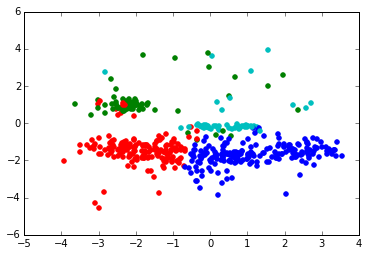

In [11]:
for seq in zip(LigPosSeq,assignments):
    seq = zip(seq[0],seq[1])
    for point in seq:
        plt.scatter(point[0][0],point[0][2],color = colors[point[1]])
#for cc in centers:
    #plt.scatter(cc[0],cc[1],color = 'black')

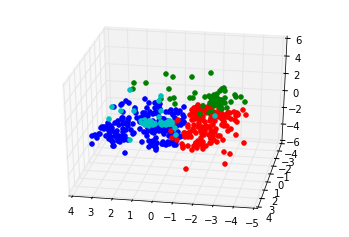

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.view_init(elev=30., azim=100)

for seq in zip(LigPosSeq,assignments):
    seq = zip(seq[0],seq[1])
    for point in seq:
        ax.scatter(point[0][0],point[0][1],point[0][2],color = colors[point[1]])

In [13]:
assignments[9]

array([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1,
       1, 1, 1, 1])

In [15]:
LigPosSeq[0]

array([[-2.22305083,  0.74474829,  0.97833973],
       [-2.47653461,  0.31248185,  0.80323458],
       [-2.25014758,  0.68397218,  1.15992796],
       [-2.53421903,  0.04738884,  1.13570273],
       [-2.26857591, -0.49429604,  0.9658646 ],
       [-2.23213315, -1.01553035,  0.94995457],
       [-2.08298349, -0.42009547,  1.08726561],
       [-2.5324192 , -0.16736841,  0.75412041],
       [-2.59973216,  0.23054695,  1.39969826],
       [-2.3644104 ,  0.50095087,  0.81815904],
       [-2.33302689,  0.36712661,  0.87139493],
       [-2.40389228, -0.47915402,  0.54742062],
       [-2.83657241, -0.22518389,  0.98426962],
       [-2.2561965 , -0.45690644,  1.20688534],
       [-2.6482265 ,  0.05513598,  1.0557307 ],
       [-2.50274014, -0.51502806,  0.90780878],
       [-2.19258928, -0.23928702,  1.04143643],
       [-2.16744256, -1.17372453,  0.79395896],
       [-2.06951141, -1.3562479 ,  0.77414626],
       [-2.21219182, -0.98313475,  0.89402884],
       [-2.24819875, -1.09371209,  0.775